# Cancer detection

In [17]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.utils import image_dataset_from_directory
from PIL import Image
from sklearn.metrics import (
    roc_auc_score,
    RocCurveDisplay,
    roc_curve,
    ConfusionMatrixDisplay
)

<IPython.core.display.Javascript object>

In [18]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [19]:
sample_submission = pd.read_csv('../data/sample_submission.csv')
train_labels = pd.read_csv('../data/train_labels.csv')
test_dir = '../data/test/'
train_dir = '../data/train/'
train_jpeg_dir = '../data/train_jpeg/'
test_jpeg_dir = '../data/test_jpeg/'


<IPython.core.display.Javascript object>

In [20]:
tf.device("/gpu:0")

<IPython.core.display.Javascript object>

In [21]:
# for file in os.listdir(train_dir):
#     file_pref = file[:-4]
#     outfile = file[:-3] + "jpeg"
#     im = Image.open(train_dir + file)
#     out = im.convert("RGB")
#     out.save(train_jpeg_dir + str(train_labels.set_index('id').loc[file_pref,'label']) + '/' + outfile, "JPEG") 

<IPython.core.display.Javascript object>

In [22]:
# for file in os.listdir(test_dir):
#     file_pref = file[:-4]
#     outfile = file[:-3] + "jpeg"
#     im = Image.open(test_dir + file)
#     out = im.convert("RGB")
#     out.save(test_jpeg_dir + outfile, "JPEG") 

<IPython.core.display.Javascript object>

In [23]:
train_dataset = image_dataset_from_directory(
    train_jpeg_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    batch_size=1000
)


Found 220025 files belonging to 2 classes.
Using 176020 files for training.


<IPython.core.display.Javascript object>

In [24]:
validation_dataset = image_dataset_from_directory(
    train_jpeg_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    batch_size=1000,
)

Found 220025 files belonging to 2 classes.
Using 44005 files for validation.


<IPython.core.display.Javascript object>

In [25]:
test_dataset = image_dataset_from_directory(
    test_jpeg_dir,
    label_mode=None,
    seed=42,
    batch_size=1000,
    shuffle=False,
)

Found 57458 files belonging to 1 classes.


<IPython.core.display.Javascript object>

In [26]:
base_model = keras.applications.Xception(
    weights='imagenet', 
    input_shape=(256, 256, 3),
    include_top=False
)

<IPython.core.display.Javascript object>

In [27]:
for layer in base_model.layers:
    layer.trainable = False

<IPython.core.display.Javascript object>

In [28]:
inputs = keras.layers.Input([256, 256, 3], dtype = tf.uint8)
x = tf.cast(inputs, tf.float32)
x = preprocess_input(x)
x = base_model(x,training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1,activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

<IPython.core.display.Javascript object>

In [29]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()]
)

<IPython.core.display.Javascript object>

In [30]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 tf.cast_1 (TFOpLambda)      (None, 256, 256, 3)       0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 256, 256, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 256, 256, 3)      0         
 bda)                                                            
                                                                 
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0   

<IPython.core.display.Javascript object>

In [31]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

<IPython.core.display.Javascript object>

In [32]:
fit_history = model.fit(train_dataset, epochs=50, validation_data=validation_dataset, callbacks=[early_stopping])

Epoch 1/50


2022-07-23 09:02:45.820856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


177/177 [==============================] - ETA: 0s - loss: 0.5035 - binary_accuracy: 0.7539

2022-07-23 09:24:24.951923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


177/177 [==============================] - 1626s 9s/step - loss: 0.5035 - binary_accuracy: 0.7539 - val_loss: 0.4519 - val_binary_accuracy: 0.7861
Epoch 2/50
177/177 [==============================] - 1634s 9s/step - loss: 0.4399 - binary_accuracy: 0.7947 - val_loss: 0.4334 - val_binary_accuracy: 0.7965
Epoch 3/50
177/177 [==============================] - 1641s 9s/step - loss: 0.4252 - binary_accuracy: 0.8044 - val_loss: 0.4254 - val_binary_accuracy: 0.8019
Epoch 4/50
177/177 [==============================] - 1641s 9s/step - loss: 0.4175 - binary_accuracy: 0.8087 - val_loss: 0.4170 - val_binary_accuracy: 0.8096
Epoch 5/50
177/177 [==============================] - 1646s 9s/step - loss: 0.4140 - binary_accuracy: 0.8097 - val_loss: 0.4138 - val_binary_accuracy: 0.8110
Epoch 6/50
177/177 [==============================] - 1641s 9s/step - loss: 0.4086 - binary_accuracy: 0.8136 - val_loss: 0.4120 - val_binary_accuracy: 0.8124
Epoch 7/50
177/177 [==============================] - 1631s 9s/

KeyboardInterrupt: 

<IPython.core.display.Javascript object>

In [ ]:
model.save('../data/model_cancer_detection_2')

INFO:tensorflow:Assets written to: ../data/model_cancer_detection/assets


INFO:tensorflow:Assets written to: ../data/model_cancer_detection/assets


<IPython.core.display.Javascript object>

In [109]:
test_predict = model.predict(test_dataset)
results_test = pd.DataFrame(
    columns = ['id','label'],
    data = zip([x.split('/')[3].split('.')[0] for x in test_dataset.file_paths],test_predict.reshape(-1))
)
results_test['label'] = results_test['label'].apply(lambda x: int(x>0.5))

<IPython.core.display.Javascript object>

In [123]:
probas = np.array([])
labels =  np.array([])
for x, y in validation_dataset:
    probas = np.concatenate([probas, model.predict(x, verbose=False).reshape(-1)])
    labels = np.concatenate([labels, y])

1/1 [==============================] - 0s 165ms/step


<IPython.core.display.Javascript object>

In [124]:
results_validation = pd.DataFrame(
    columns = ['proba','label'],
    data = zip(probas,labels)
)
results_validation['prediction'] = results_validation['proba'].apply(lambda x: int(x>0.5))

<IPython.core.display.Javascript object>

In [111]:
#validation_predict = model.predict(validation_dataset)
#results_validation = pd.DataFrame(
#    columns = ['id','proba'],
#    data = zip([x.split('/')[4].split('.')[0] for x in validation_dataset.file_paths],validation_predict.reshape(-1))
#)
#results_validation['prediction'] = results_validation['proba'].apply(lambda x: int(x>0.5))

45/45 [==============================] - 318s 7s/step


<IPython.core.display.Javascript object>

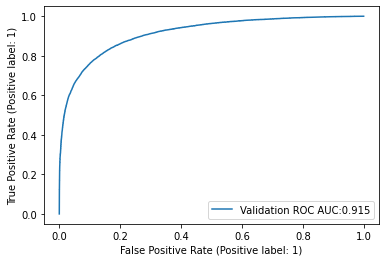

<IPython.core.display.Javascript object>

In [128]:
RocCurveDisplay.from_predictions(
    results_validation['label'],
    results_validation['proba'],
    label=f"Validation ROC AUC:{round(roc_auc_score(results_validation['label'], results_validation['proba']),3)}",
)

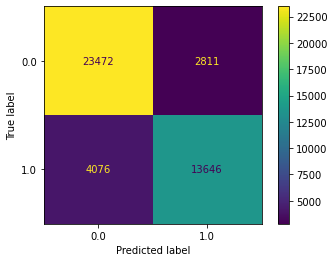

<IPython.core.display.Javascript object>

In [136]:
ConfusionMatrixDisplay.from_predictions(
    results_validation['label'],
    results_validation['prediction']
)